In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as stats_graph_tsa
import statsmodels.tsa.stattools as stat_tsa_stats
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pandas_datareader import data as wb
from scipy.stats.distributions import chi2
from datetime import datetime

sns.set()

**Treating Data**

In [ ]:
raw_csv_data = pd.read_csv('../01 - Intro/IndexE8.csv')
df_complete = raw_csv_data.copy()
df_complete['market_value'] = df_complete.ftse
df_complete.date = pd.to_datetime(df_complete.date, dayfirst = True)
df_complete.date = df_complete.set_index('date', inplace = True)
df_complete = df_complete.asfreq('b')
df_complete = df_complete.fillna(method = 'ffill')
del df_complete['dax']
del df_complete['ftse']
del df_complete['nikkei']
del df_complete['spx']
size = int(len(df_complete) * 0.8)
df, df_test = df_complete.iloc[:size], df_complete.iloc[size:]

**LLR Test**

In [ ]:
def LLR_Test (mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf

    LR = (2 * (L2 - L1))
    pvalue = chi2.sf(LR, DF).round(4)

    return pvalue

**DF-Test**

In [ ]:
''' PValue -> 0.33 -> Indicates that the data extracted is probably a non-stationary process'''
stat_tsa_stats.adfuller(df.market_value)

**Returns -> Is the % change between the values for two consecutive periods**

In [ ]:
'''
So
    R > 0 -> Indicates positive returns
    R < 0 -> Indicates negative returns
'''
#Get the percentage change between the current and prior element
df['returns'] = df.market_value.pct_change(1).mul(100)
df

In [ ]:
df = df.iloc[1:]
df

In [ ]:
#Trying DF-Test again
print(stat_tsa_stats.adfuller(df.returns))
print('---------------------------------------------')
print(stat_tsa_stats.adfuller(df.market_value))

**ACF and PACF for Returns**

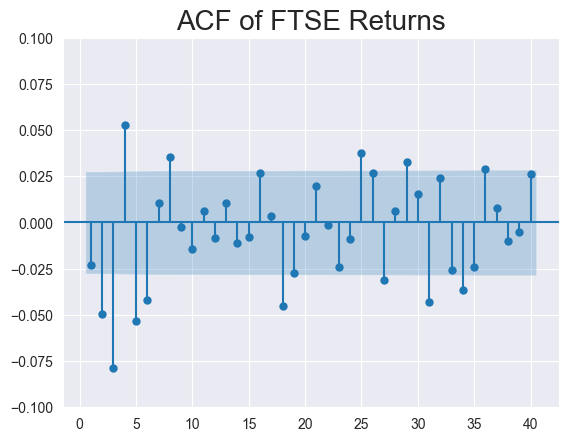

In [24]:
stats_graph_tsa.plot_acf(df.returns, lags = 40, zero = False)
plt.title('ACF of FTSE Returns', size = 20)
plt.ylim([-0.1,0.1])
plt.show()

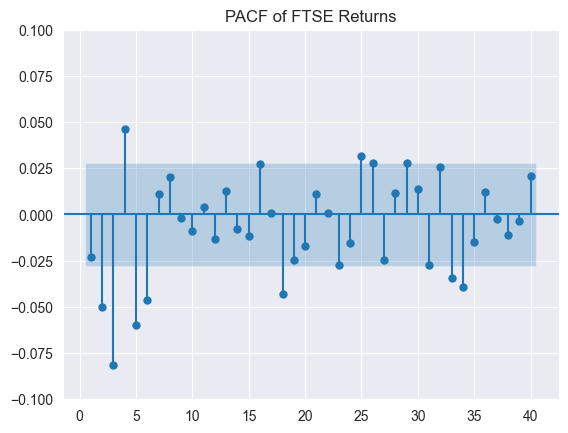

In [26]:
stats_graph_tsa.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title('PACF of FTSE Returns')
plt.ylim([-0.1,0.1])
plt.show()